In [20]:
from __future__ import division 

import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
from IPython.display import Image, SVG
import pylab

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [157]:
import cv2
import numpy as np
import math
img = cv2.imread('.\\Desktop\\bien_xe.jpg',0)
kernel = np.ones((5,5),np.uint8)
img = cv2.dilate(img,kernel,iterations = 1)
img = cv2.erode(img,kernel,iterations = 1)
dst = cv2.Canny(img, 50, 200, None, 3)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, 3)
# gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
# temp = cv2.HoughLines(img,1,np.pi / 180, 150)
# dilation = cv2.dilate(dilation,kernel,iterations = 1)
# erosion = cv2.erode(erosion,kernel,iterations = 1)


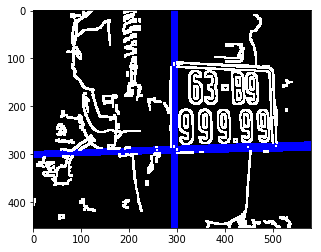

In [159]:
import matplotlib.pyplot as plt
cdst = cv2.dilate(cdst,kernel,iterations = 1)
plt.imshow(cdst)

In [11]:
findEmailDomain = lambda a: a[:(a[::-1].find('@'))]
findEmailDomain("dcnkjana@example.com")

'xe@anajkncd'

In [21]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing

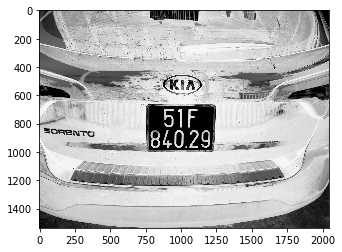

In [168]:
import cv2
import numpy as np
from matplotlib import pyplot as mlt
img_path = '.\\Desktop\\4.jpg'
image = cv2.imread(img_path,0)
mlt.imshow(image, cmap = 'Greys')

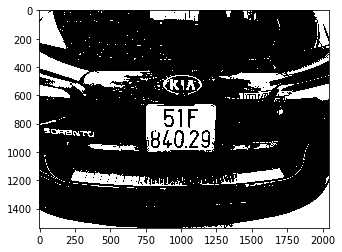

In [169]:
ret, img = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)
mlt.imshow(img,cmap = 'Greys')

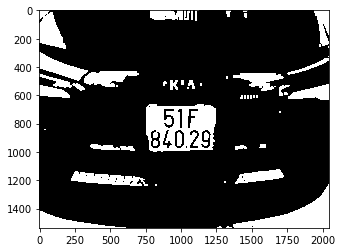

In [173]:
kernel = np.ones((12,12),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
mlt.imshow(closing, cmap ='Greys')

544 379 1 1
569 346 1 2
556 339 5 3
467 323 4 5
485 319 9 3
565 315 15 16
552 301 13 13
566 285 1 1
554 176 6 4
545 133 1 1
555 127 3 2
562 122 1 1
529 112 3 3
555 108 3 2
84 14 2 2
0 0 580 454
297 250 18 18
135 223 40 32
345 139 31 45
502 132 15 17
297 119 201 170


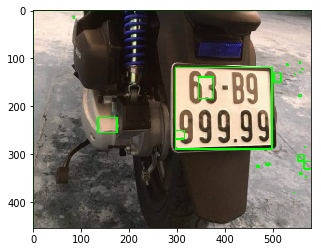

In [152]:
# a = cv2.bitwise_not(img)
b = cv2.imread(img_path)
ret, img = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(contours[0][0,0,0])
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    print(x,y,w,h)
    cv2.rectangle(b, (x,y), (x+w,y+h), (0,255,0), 2)
mlt.imshow(b,cmap='Greys')

In [159]:
def findLargestArea(longList):
    biggest_A = 0
    for contour in longList:
        x,y,w,h = cv2.boundingRect(contour)
        if x==0 and y==0:
            continue
#         print(x,y,w,h)
        A = w*h
    #         print(A)
#         print(biggest_A)
        if (A > biggest_A):
            license_plate = (x,y,w,h)
            biggest_A = A
            print(biggest_A)
    return license_plate
            

1
2
15
20
27
240
324
1280
1395
34170
(297, 119, 201, 170)


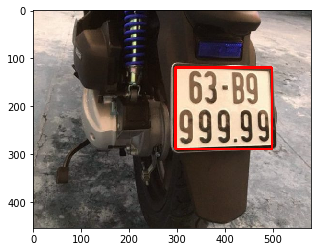

In [160]:
temp = findLargestArea(contours)
print(temp)
img_path = '.\\Desktop\\bien_xe.jpg'
b = cv2.imread(img_path)
cv2.rectangle(b, (temp[0],temp[1]), (temp[0]+temp[2],temp[1]+temp[3]), (255,0,0), 3)
mlt.imshow(b)
    

1
66
196
238
506
55330
(757, 924, 503, 110)


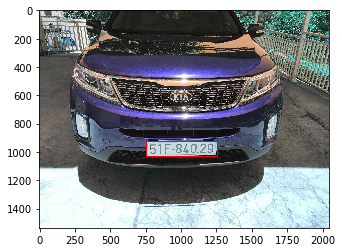

In [167]:
def findLicensePlate(img_path):
    image = cv2.imread(img_path)
    gray =  cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, img = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((12,12),np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    temp = findLargestArea(contours)
    print(temp)
    cv2.rectangle(image, (temp[0],temp[1]), (temp[0]+temp[2],temp[1]+temp[3]), (255,0,0), 5)
    mlt.imshow(image)
#     return contours
contours = findLicensePlate('.\\Desktop\\5.jpg')